# PROJECT TITLE: CORRELATION
### SUBTITLE: INVESTIGATING THE LIKELY FACTORS THAT INFLUENCE REVENUE USING HOLLYWOOD MOVIES DATASET

OBJECTIVE: We would be using the data provided to test certain assumptions using statistical methods. We want to see the effects that the company and budget
have on the gross revenue generted by the movie, also we want to test if higher grossing movies translate into customer pleasing movies. Finally we would 
categorize this data by genre to see which of the genres have the most economic performance (the most profitable from the dataset provided)

Let's jump in



First we'd import libraries and set dependencies for the visual section of the project

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')

%matplotlib inline
plt.rcParams['figure.figsize']=(9,6)

Next, we'd read in the data and view a snapshot usng the head function of the pandas library.

In [2]:
# Read in the data

movie = pd.read_csv('movies.csv')
movie.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
0,8000000.0,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414.0,Stand by Me,R,1986-08-22,89,8.1,Wil Wheaton,299174,Stephen King,1986
1,6000000.0,Paramount Pictures,USA,John Hughes,Comedy,70136369.0,Ferris Bueller's Day Off,PG-13,1986-06-11,103,7.8,Matthew Broderick,264740,John Hughes,1986
2,15000000.0,Paramount Pictures,USA,Tony Scott,Action,179800601.0,Top Gun,PG,1986-05-16,110,6.9,Tom Cruise,236909,Jim Cash,1986
3,18500000.0,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248.0,Aliens,R,1986-07-18,137,8.4,Sigourney Weaver,540152,James Cameron,1986
4,9000000.0,Walt Disney Pictures,USA,Randal Kleiser,Adventure,18564613.0,Flight of the Navigator,PG,1986-08-01,90,6.9,Joey Cramer,36636,Mark H. Baker,1986


#### Cleaning and Exploration of the dataset

In [3]:
# Summary statistics

movie.describe()

,budget,gross,runtime,score,votes,year
count,6.820000e+03,6.820000e+03,6820.00000,6820.000000,6.820000e+03,6820.000000
mean,2.458113e+07,3.349783e+07,106.55132,6.374897,7.121952e+04,2001.000293
std,3.702254e+07,5.819760e+07,18.02818,1.003142,1.305176e+05,8.944501
min,0.000000e+00,7.000000e+01,50.00000,1.500000,2.700000e+01,1986.000000
25%,0.000000e+00,1.515839e+06,95.00000,5.800000,7.665250e+03,1993.000000
50%,1.100000e+07,1.213568e+07,102.00000,6.400000,2.589250e+04,2001.000000
75%,3.200000e+07,4.006534e+07,115.00000,7.100000,7.581225e+04,2009.000000
max,3.000000e+08,9.366622e+08,366.00000,9.300000,1.861666e+06,2016.000000


In [4]:
#Check for the length of the dataframe and compare it to the values from the stats

len(movie)

6820

In [5]:
# Next, we will return the percentage of the null values in the different columns

for cols in movie.columns:
    pct_null = movie[cols].isnull().mean()
    print(f'{cols}-{pct_null}%')


budget-0.0%
company-0.0%
country-0.0%
director-0.0%
genre-0.0%
gross-0.0%
name-0.0%
rating-0.0%
released-0.0%
runtime-0.0%
score-0.0%
star-0.0%
votes-0.0%
writer-0.0%
year-0.0%


###### The results show that there are no missing values in any of the columns. Next we woud check the data types for each of the columns and begin cleaning by removing unnecessary decimal values from the numerical columns

In [6]:
# To check the data types

movie.dtypes

budget      float64
company      object
country      object
director     object
genre        object
gross       float64
name         object
rating       object
released     object
runtime       int64
score       float64
star         object
votes         int64
writer       object
year          int64
dtype: object

In [7]:
# To remove the decimal from the budget and gross revenue columns, simply change the data type

movie['budget']=movie['budget'].astype(int)
movie['gross']=movie['gross'].astype(int)
movie.head(2)

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
0,8000000,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414,Stand by Me,R,1986-08-22,89,8.1,Wil Wheaton,299174,Stephen King,1986
1,6000000,Paramount Pictures,USA,John Hughes,Comedy,70136369,Ferris Bueller's Day Off,PG-13,1986-06-11,103,7.8,Matthew Broderick,264740,John Hughes,1986


In [9]:
# Because there is a discrepancy between the year recorded in the Released column and the Year column
# I will create a new year column for the year in the released column and use this as the year column.
# The assumption here is that the Year recorded in the release date and the Year recorded in the year date should be the same

movie['release_yr'] = movie['released'].astype(str).str[:4]
# A quick way to get around using a regex pattern to extract this information is to cast the data as a string and 
# use the regular string slicing method
movie.head(2)

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,release_yr
0,8000000,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414,Stand by Me,R,1986-08-22,89,8.1,Wil Wheaton,299174,Stephen King,1986,1986
1,6000000,Paramount Pictures,USA,John Hughes,Comedy,70136369,Ferris Bueller's Day Off,PG-13,1986-06-11,103,7.8,Matthew Broderick,264740,John Hughes,1986,1986


In [10]:
#Order the data by the gross revenue
movie = movie.sort_values(by=['gross'], inplace=False, ascending=False)

## Test For Correlation

Hypothesis:
   1. The budget may have a high correlation to revenue
   2. The company name may have a high correlation with the gross revenue


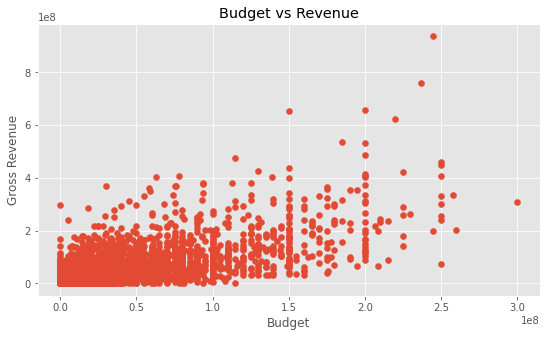

In [44]:
# 1. create a scatter plot to show the relationsip between budget and gross revenue
plt.rcParams['figure.figsize']=(9,5)

plt.scatter(x=movie['budget'], y=movie['gross'])
plt.title('Budget vs Revenue')
plt.xlabel('Budget')
plt.ylabel('Gross Revenue')

plt.show()


From the chart above it is slightly evident that there is a positie correlation between budget and gross revenue. A regression plot will confirm that this relationship exists

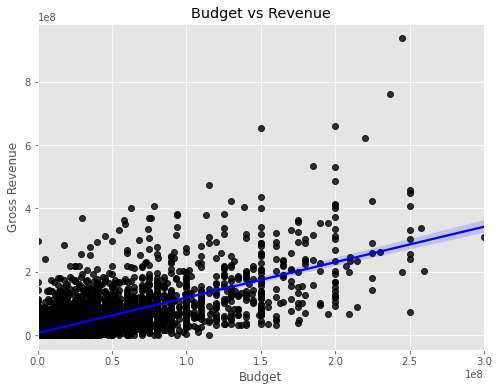

In [41]:
plt.rcParams['figure.figsize']=(8,6)
sns.regplot(x='budget', y='gross', data=movie, scatter_kws={'color':'black'},line_kws={'color':'blue'})

plt.title('Budget vs Revenue')
plt.xlabel('Budget')
plt.ylabel('Gross Revenue')

plt.show()

 The regression line and the points of the plot show that as the budget increases, the revenue increases. To confirm this, lets use the pearson correlation method and a heatmap to display this result

In [47]:
# create a correlation matrix mov from the movies data
mov = movie.corr(method='pearson')
mov

,budget,gross,runtime,score,votes,year
budget,1.000000,0.712196,0.268226,0.042145,0.503924,0.291009
gross,0.712196,1.000000,0.224579,0.165693,0.662457,0.191548
runtime,0.268226,0.224579,1.000000,0.395343,0.317399,0.087639
score,0.042145,0.165693,0.395343,1.000000,0.393607,0.105276
votes,0.503924,0.662457,0.317399,0.393607,1.000000,0.229304
year,0.291009,0.191548,0.087639,0.105276,0.229304,1.000000


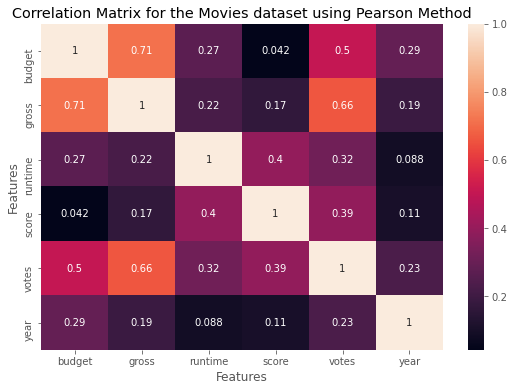

In [48]:
# Heatmap of the correlation matrix above

sns.heatmap(mov, annot=True)

plt.title('Correlation Matrix for the Movies dataset using Pearson Method')
plt.xlabel('Features')
plt.ylabel('Features')

plt.show()

In [69]:
# 2. View the data and create a sctatter plot to show the relationship between compant and gross

movie.head(2)

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,release_yr
6380,245000000,Lucasfilm,USA,J.J. Abrams,Action,936662225,Star Wars: The Force Awakens,PG-13,2015-12-18,136,8.1,Daisy Ridley,687192,Lawrence Kasdan,2015,2015
5061,237000000,Twentieth Century Fox Film Corporation,UK,James Cameron,Action,760507625,Avatar,PG-13,2009-12-18,162,7.8,Sam Worthington,954412,James Cameron,2009,2009


In [71]:
# To check the correlation of a string column like company, I'd numerize the column by converting the string column to numbers on A COPY
# of the dataframe

movs = movie.copy()

if movs['company'].dtype == 'object':
    movs['company'] = movs['company'].astype('category')
    movs['company'] = movs['company'].cat.codes
movs.head(7)

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,release_yr
6380,245000000,1428,USA,J.J. Abrams,Action,936662225,Star Wars: The Force Awakens,PG-13,2015-12-18,136,8.1,Daisy Ridley,687192,Lawrence Kasdan,2015,2015
5061,237000000,2062,UK,James Cameron,Action,760507625,Avatar,PG-13,2009-12-18,162,7.8,Sam Worthington,954412,James Cameron,2009,2009
2420,200000000,2062,USA,James Cameron,Drama,658672302,Titanic,PG-13,1997-12-19,194,7.8,Leonardo DiCaprio,862554,James Cameron,1997,1997
6391,150000000,2085,USA,Colin Trevorrow,Action,652270625,Jurassic World,PG-13,2015-06-12,124,7.0,Chris Pratt,469200,Rick Jaffa,2015,2015
5723,220000000,1491,USA,Joss Whedon,Action,623357910,The Avengers,PG-13,2012-05-04,143,8.1,Robert Downey Jr.,1064633,Joss Whedon,2012,2012
4840,185000000,2123,USA,Christopher Nolan,Action,534858444,The Dark Knight,PG-13,2008-07-18,152,9.0,Christian Bale,1839571,Jonathan Nolan,2008,2008
6614,200000000,1428,USA,Gareth Edwards,Action,532177324,Rogue One,PG-13,2016-12-16,133,7.9,Felicity Jones,365473,Chris Weitz,2016,2016


Notice how the company column datatype has been changed from an object into an integer so we can create a correlation matrix for this information and regression plots

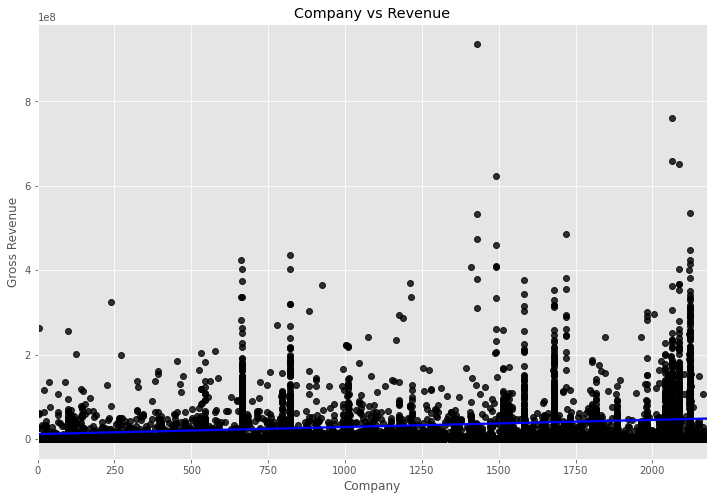

In [72]:
sns.regplot(x='company', y='gross', data=movs, scatter_kws={'color':'black'},line_kws={'color':'blue'})

plt.title('Company vs Revenue')
plt.xlabel('Company')
plt.ylabel('Gross Revenue')

plt.show()

We can observe and thus infer that although the regression line seems to be inclined to the right, the correlation between company and the budget is low. A correlation matrix will wither prove or disprove this theory

In [73]:
# create a correlation matrix mov from the movies data
mov = movs.corr(method='pearson')
mov

,budget,company,gross,runtime,score,votes,year
budget,1.000000,0.187205,0.712196,0.268226,0.042145,0.503924,0.291009
company,0.187205,1.000000,0.187220,0.033058,-0.010426,0.138662,0.036272
gross,0.712196,0.187220,1.000000,0.224579,0.165693,0.662457,0.191548
runtime,0.268226,0.033058,0.224579,1.000000,0.395343,0.317399,0.087639
score,0.042145,-0.010426,0.165693,0.395343,1.000000,0.393607,0.105276
votes,0.503924,0.138662,0.662457,0.317399,0.393607,1.000000,0.229304
year,0.291009,0.036272,0.191548,0.087639,0.105276,0.229304,1.000000


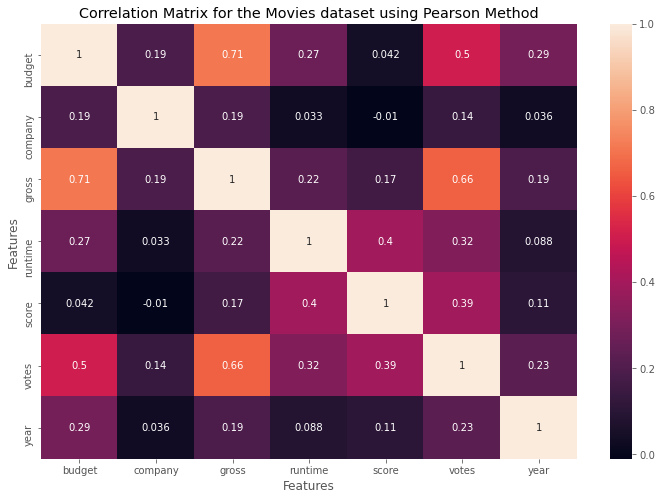

In [74]:
# Heatmap of the correlation matrix above

sns.heatmap(mov, annot=True)

plt.title('Correlation Matrix for the Movies dataset using Pearson Method')
plt.xlabel('Features')
plt.ylabel('Features')

plt.show()

It is thus evident that against the previous assumption that the company name would somehow influence the revenue, 
the correlation is low, 0.19 and cannot be though to influence the gross revenue significantly. However we have observed
that the VOTES strongly influence the revenue, 0.66, indicating that higher votes on a movie relate directly to higher revenue margins, this may be used to infer that high votes mean increased customer satisfaction but this should be sublject to more investigation.

3. Finally let's look at a simple pivot table showing the genres

In [63]:
# snapshot of the dataframe
movie.head(9)

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,release_yr
6380,245000000,Lucasfilm,USA,J.J. Abrams,Action,936662225,Star Wars: The Force Awakens,PG-13,2015-12-18,136,8.1,Daisy Ridley,687192,Lawrence Kasdan,2015,2015
5061,237000000,Twentieth Century Fox Film Corporation,UK,James Cameron,Action,760507625,Avatar,PG-13,2009-12-18,162,7.8,Sam Worthington,954412,James Cameron,2009,2009
2420,200000000,Twentieth Century Fox Film Corporation,USA,James Cameron,Drama,658672302,Titanic,PG-13,1997-12-19,194,7.8,Leonardo DiCaprio,862554,James Cameron,1997,1997
6391,150000000,Universal Pictures,USA,Colin Trevorrow,Action,652270625,Jurassic World,PG-13,2015-06-12,124,7.0,Chris Pratt,469200,Rick Jaffa,2015,2015
5723,220000000,Marvel Studios,USA,Joss Whedon,Action,623357910,The Avengers,PG-13,2012-05-04,143,8.1,Robert Downey Jr.,1064633,Joss Whedon,2012,2012
4840,185000000,Warner Bros.,USA,Christopher Nolan,Action,534858444,The Dark Knight,PG-13,2008-07-18,152,9.0,Christian Bale,1839571,Jonathan Nolan,2008,2008
6614,200000000,Lucasfilm,USA,Gareth Edwards,Action,532177324,Rogue One,PG-13,2016-12-16,133,7.9,Felicity Jones,365473,Chris Weitz,2016,2016
6687,200000000,Pixar Animation Studios,USA,Andrew Stanton,Animation,486295561,Finding Dory,PG,2016-06-17,97,7.4,Ellen DeGeneres,173005,Andrew Stanton,2016,2016
2870,115000000,Lucasfilm,USA,George Lucas,Action,474544677,Star Wars: Episode I - The Phantom Menace,PG,1999-05-19,136,6.5,Ewan McGregor,584809,George Lucas,1999,1999


In [29]:
mov_pvt.head(2)

,gross
genre,
Action,7.479263e+10
Comedy,5.354342e+10


In [77]:
mov_pvt = movie.pivot_table(values=['gross','budget'], index='genre', aggfunc='sum')
#mov_pvt.head(2)
mov_pvt = mov_pvt.sort_values(by='gross')

mov_pvt.head(2)



,budget,gross
genre,,
War,0.0,1509775.0
Musical,10000000.0,8094993.0


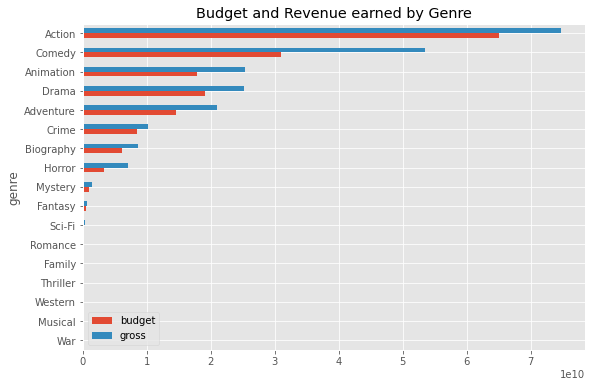

In [78]:

mov_pvt.plot(kind='barh', title='Budget and Revenue earned by Genre')
plt.show()

The chart above shows that the most profitable genres over the time period covered by the dataset are Action and comedy. These movies have shown the largest profit over the years, the combination which more than doubles the revenue of the next three or four categories, but of worthy note is that the budget for these two categories more than match the outcome.

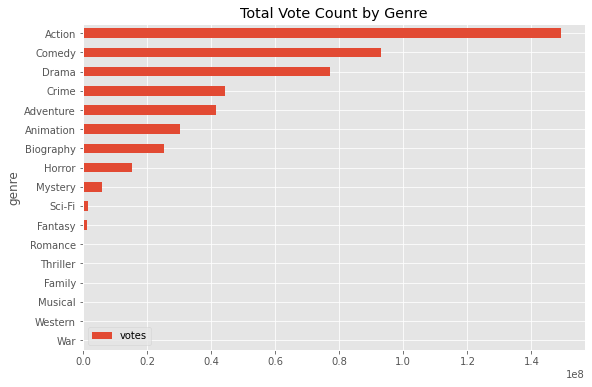

In [73]:
mov_pvt2 = movie.pivot_table(values=['votes'], index='genre', aggfunc='sum')
#mov_pvt.head(2)
mov_pvt2 = mov_pvt2.sort_values(by='votes')

mov_pvt2.plot(kind='barh', title='Total Vote Count by Genre')
plt.show()

Looking at the vote count by genre seems to show a similar pattern to the budget and revenue chart. we would need to further investigate if the results that show a high correlation between votes and budget and a similar trend between votes and genre imply that consumers of these products base their voting decision on genre of=r if other factors are at work

## In Summary:

I have been able to prove that one of our hypotheses held true, that is,
1. the budget spent on a movie will have a great influence on how much is generated in revenue
2. The company name however popular, has little to no effect on the revenue grossed by the movie
Also observed is that the votes (which may or may not be influenced by the customers love for the category) has a significant influence on the revenue of the film